# SCIKIT-LEARN
## useful in learning patterns in data & making ML models, it also implements tools to help us evaluate those predictions

- It is built on numpy, matplotlib & python
- Has many in-built ML models
- Has methods to evaluate the models
- Very well designed API

## sk-learn workflow
0. End to end scikit-learn workflow
1. Get data ready>
2. pick a model\estimator(to suit your problem)>
3. Fit the model to the data & make a prediction>
4. Evaluate the model
5. Improve through experimentation
6. Save & reload your trained ML model
7. Putting it all together

In [1]:
#Basically, the ML function created from input & output is called model/algorithm/Bot/Brain

## 0. End to end scikit-learn workflow

In [2]:
#1.Get the data ready
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X (features matrix)
x = heart_disease.drop('target', axis=1)
# Create y (label)
y = heart_disease['target']

In [4]:
sklearn.show_versions()


System:
    python: 3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:14) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\hp\Desktop\sample_project_1\env\python.exe
   machine: Windows-11-10.0.22631-SP0

Python dependencies:
      sklearn: 1.6.1
          pip: 25.0
   setuptools: 72.1.0
        numpy: 2.2.4
        scipy: 1.15.2
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 4
         prefix: mkl_rt
       filepath: C:\Users\hp\Desktop\sample_project_1\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: vcomp
       filepath: C:\Users\hp\Desktop\sample_project_1\env\vcomp140.dll
        version: None


In [5]:
#2.choose the right model & hyperparameters
from sklearn.ensemble import RandomForestClassifier##it is a classification ML model
clf = RandomForestClassifier(n_estimators=100)

# keep the default Hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3.fit the model to the training data.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x,y, test_size=0.2)

In [7]:
clf.fit(x_train, y_train); ## it can give a warning for n_estimator params, go above and reset. ; to remove the comments..##Now fitted.

In [8]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


In [9]:
# make a prediction
#y_label = clf.predict(np.array([0,2,3,4]))>> can not predict this since the model is in 1d and not 2d as in the training data
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [10]:
y_test

288    0
250    0
141    1
238    0
104    1
      ..
169    0
96     1
241    0
147    1
157    1
Name: target, Length: 61, dtype: int64

In [11]:
# 4.Evaluate the model on the training data and test data
clf.score(x_train,y_train)

1.0

In [12]:
clf.score(x_test,y_test)

0.819672131147541

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.83      0.81      0.82        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[25,  5],
       [ 6, 25]])

In [15]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [16]:
# 5. Improve the model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimamtors...')
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f'Model accuracy on test set: {clf.score(x_test,y_test)*100:.2f}%')
    print('')

Trying model with 10 estimamtors...
Model accuracy on test set: 80.33%

Trying model with 20 estimamtors...
Model accuracy on test set: 77.05%

Trying model with 30 estimamtors...
Model accuracy on test set: 85.25%

Trying model with 40 estimamtors...
Model accuracy on test set: 81.97%

Trying model with 50 estimamtors...
Model accuracy on test set: 81.97%

Trying model with 60 estimamtors...
Model accuracy on test set: 78.69%

Trying model with 70 estimamtors...
Model accuracy on test set: 81.97%

Trying model with 80 estimamtors...
Model accuracy on test set: 85.25%

Trying model with 90 estimamtors...
Model accuracy on test set: 81.97%



In [17]:
# 6. save the model & load it
import pickle
pickle.dump(clf,open('random_forest_model_1.pkl', 'wb')) #wb store in binary, with binary

In [18]:
#importing the model from files
loaded_model = pickle.load(open('random_forest_model_1.pkl','rb'))# rb- read binaries
loaded_model.score(x_test,y_test)## gets as the last parameter set (90 as n_estimators)

0.819672131147541

## Dealing with warnings in Jupyter
### 1. (sort each directly) or 
### 2. import warnings;
import warnings
   warnings.filterwarnings('ignore') or to 'default'---ignoring all the warnings not ok, unless you understand the notebook. some warnings might be useful
### 3. or update the specific package eg sklearn.
Go back to terminal.,Search from the documeentation, conda list, conda activate sklearn doesn't change if dependencies
conda search scikit-learn>this shows available updates. conda search scikit-learn--info ie this tells you the required dependendencies eg python versions etc
if the dependency available, 'conda uninstall both ' then install both with the required specific version. After uninstalling, you can't run the required package-kernel error
install all the required packages, & then ready to go without errors

In [19]:
what_am_covering = [
    '0. End to end scikit-learn workflow'
    '1. Get data ready>'
    '2. pick a model|estimator(to suit your problem)>'
    '3. Fit the model to the data & make a prediction>'
    '4. Evaluate the model'
    '5. Improve through experimentation'
    '6. Save & reload your trained ML model'
    '7. Putting it all together']

In [20]:
what_am_covering

['0. End to end scikit-learn workflow1. Get data ready>2. pick a model|estimator(to suit your problem)>3. Fit the model to the data & make a prediction>4. Evaluate the model5. Improve through experimentation6. Save & reload your trained ML model7. Putting it all together']

In [21]:
#standard imports- pd,np,plt- already done

## 1. Getting our data read to be used with ML
Three things to be done:
1. splitinng data into features and labels( usually 'x' and 'y')
2. filling (also called imputing) or disregarding missing values
3. converting non-numerical values to numerical values(also called feature encoding)

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#labeling the data
x = heart_disease.drop('target', axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
x.shape

(303, 13)

In [28]:
len(heart_disease)

303

In [29]:
242+61#(o.8 for training & 0.2 for testing)

303

## cleaning data(missing,av,outliers etc) > transforming data(eg convert non-num to numerical eg o's & 1's) > reducing data(same results on small data ok.save finance,space etc by like removing unnecessary columns etc

## 1.1 make sure it is all numerical

In [30]:
car_sales = pd.read_csv('data/car-sales-extended (1).csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [31]:
len(car_sales)

1000

In [32]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [33]:
#split into X,y
x = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# spliit into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [34]:
# Build machine Learning model
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(x_train,y_train)
# model.score(x_test, y_test) ##can not run since the first 2 columns are str

In [35]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [36]:
# Turn columnn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [37]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
##Another way using pd
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies.head()                    

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False


In [39]:
# let's refit our data
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
np.random.seed(42)
x_train,x_test, y_train, y_test =  train_test_split( transformed_x, y, test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
model.score(x_test,y_test)

0.3235867221569877

In a newer version of Scikit-Learn (0.23+), the OneHotEncoder class was upgraded to be able to handle None & NaN values. Older versions will show input error of NaN. correct as shown even if you do not see error

## 1.2 What if there were missing Values?
### 1.Fill them with some data(imputations)
### 2.Remove the samples with missing data altogether

In [41]:
#import car_sales_missing_data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data (1).csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# conversion can not run unless you sort the missing values

In [44]:
#create x & y 
# x = car_sales_missing.drop('Price', axis=1)
# y = car_sales_missing['Price']

In [45]:
#let's convert our categories into numbers
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# categorical_features = ['Make', 'Colour','Doors']
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([('one_hot',
#                                   one_hot,
#                                   categorical_features)],
#                                   remainder='passthrough')
# transformed_x = transformer.fit_transform(x)
# transformed_x

option 1; filling data with pd

In [46]:
#myself I used the reassigning method and not 'inplace=True'
#Fill the 'Make' column
car_sales_missing['Make'] = car_sales_missing['Make'].fillna('missing')

# Fill the 'colour' column
car_sales_missing['Colour'] = car_sales_missing['Colour'].fillna('missing')

#Fill the odometer column
car_sales_missing['Odometer (KM)'] = car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean())
 #Fill the 'Doors' column
car_sales_missing['Doors'] = car_sales_missing['Doors'].fillna(4)

In [47]:
# check our DataaFrame Again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# Remove Rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [49]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [50]:
len(car_sales_missing)

950

In [51]:
#now,recreate x,y
x = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# spliit into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [52]:
#Now let us bring down the code that failed due to nan
#let's convert our categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]], shape=(950, 16))

## 0ption 2; fill missing values with sklearn

####  Feature Scaling
Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.

It's called Feature Scaling.

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

Normalization (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.

Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.

A couple of things to note.

Feature scaling usually isn't required for your target variable.

Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.

Extra reading

For further information on this topic, I'd suggest the following resources.

Feature Scaling - why is it required? by Rahul Saini

Feature Scaling with Scikit-Learn by Ben Alex Keen

Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization by Aniruddha Bhandari

## option 2; fill missing values with sklearn

Split your data first (into train/test), always keep your training & test data separate

Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

Don't use data from the future (test set) to fill data from the past (training set)
filled_X_train = imputer.fit_transform(X_train) while filled_X_test = imputer.transform(X_test)

In [53]:
##get new data since we have fill the one available
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data (1).csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [54]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
#drop the rows with no labels( y= Price)
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [56]:
#split the data into x,y
x = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']
#split data into train and test
np.random.seed(42) # to get reproducable value
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [57]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [58]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.transform(x_test)

# Check filled X_train
filled_x_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], shape=(760, 4), dtype=object)

In [59]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_x_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_x_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [60]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]], shape=(760, 15))

In [61]:
#Now our data is in numbers & filled(no missing values), let's fit a model.
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_x_train, y_train)
model.score(transformed_x_test, y_test)


0.21229043336119102

In [62]:
len(car_sales), len(car_sales_missing) # why the model scored poorlyy

(1000, 950)

# 2. Choosing the right estimator/algorithm for your project

some things to note:
* sklearn refers to ML models, algorithm as estimators. Under estimators we have we have classifiers, Regressors etc
* Classification Problem - predicting a category(heart_disease or not)- sometimes you will see clf (classifier) used as a classification estimator
* Regression problem- predicting a number (such as a Bp of a car)-use a regressor

In [63]:
# sklearn ML models map- different for; classification, regression, clustering, dimensionality reduction. Follow it through

### 2.1 Picking a ML model for Regression problem
let's use the Carlifonia Housing dataset. just google( you can practise on) https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [64]:
# Get the california Hoousing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [65]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [66]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [67]:
# housing_df = housing_df.drop('target',axis=1)
# housing_df.head()

In [68]:
## ie use those features tto predict target value

In [69]:
#import algorithm/estimator- follow the sklearn ml model map, where not sure try out and then compare what seems to work best
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(42)

#create the data
x = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

# the dataset has no missing values & is all in numerical form, no need to fill/impute or encode

# instantiate & fit the model( On the training set)- follow the map, on features onwards, test the models( above first line)
model = Ridge()
model.fit(x_train, y_train)
# check the score of the model on the test set
model.score(x_test,y_test) # returns the coefficient of determination(r2)

0.5758549611440126

In [70]:
## how to improove this model; add more data, choose a different model & try out
# let me try out other models as per the map

In [71]:
#import algorithm/estimator- follow the sklearn ml model map, where not sure try out and then compare what seems to work best
from sklearn.linear_model import Lasso

# set up random seed
np.random.seed(42)

#create the data
x = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

# the dataset has no missing values & is all in numerical form, no need to fill/impute or encode

# instantiate & fit the model( On the training set)- follow the map, on features onwards, test the models( above first line)
model = Lasso()
model.fit(x_train, y_train)
# check the score of the model on the test set
model.score(x_test,y_test) # returns the coefficient of determination(r2)  ie performs poorer.

0.2841671821008396

* what if "Ridge' didn't work or the score didn't fit our needs.
* let's try ensemble- it combines several estimators to make better predictor. 
* They are based on decision tree. RandomForest uses several decision trees

In [72]:
# Import RandomForestRegressor model class from ensemble module
from sklearn.ensemble import RandomForestRegressor

# set up random seed
np.random.seed(42)

#create the data
x = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

# the dataset has no missing values & is all in numerical form, no need to fill/impute or encode

# instantiate & fit the model( On the training set)- follow the map, on features onwards, test the models( above first line)
model = RandomForestRegressor()
model.fit(x_train, y_train)
# check the score of the model on the test set
model.score(x_test,y_test) # returns the coefficient of determination(r2)  ie performs poorer.

0.8065734772187598

* It uses the regression Predictive metrics; MAE, MSE, RMSE, R-squared(coefficient determination), Adjusted R-squared, MAPE

### 2.2 Picking a ML model for a classification Problem
let's go to the map https://scikit-learn.org/stable/machine_learning_map.html

In [73]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
len(heart_disease)

303

consulted the map & it suggested linear svc

In [75]:
# importt the linearSVC from the linear class
from sklearn import svm

#setup Random seed
np.random.seed(42)

# make the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

# instantiate linearSVC
clf = svm.SVC()
clf.fit(x_train,y_train)

# check the linearSVC model score on test data
clf.score(x_test,y_test)

0.7049180327868853

In [76]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [77]:
## check another model. ensemble.RandomForestClassifier performs best
# import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#setup Random seed
np.random.seed(42)

# make the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# check the RandomForestClassifier score on test data
clf.score(x_test,y_test) ##scores better than linearSVC

0.8524590163934426

Tidbit
* if you have structured data, use ensemble methods
* if you have unstructured data, use deep learning or transfer learning

# 3. Fitting a Model on our data & Make predictions on Our data
## 3.1 fitting the model on our data

- x = features, feature variable and data
- y = labels, target, target variable
- check RandomForest Wikipedia to understand how it works

In [78]:
## check another model. ensemble.RandomForestClassifier performs best
# import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#setup Random seed
np.random.seed(42)

# make the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()

#FIT THE MODEL TO THE DATA ( TRAINING THE ML MODEL )
clf.fit(x_train,y_train)

# check the RandomForestClassifier score on test data ( use the patterns the model has learnt)
clf.score(x_test,y_test) ##scores better than linearSVC

0.8524590163934426

In [79]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [80]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

 ## 3.2. Making Predictions Using a Machine Learning Model
 * 2 ways to make predictions:
   - predict()
   - predict_proba()

In [81]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [82]:
# use trained data to make predictions
clf.predict(x_test) # the predictions outcome down there

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [83]:
np.array(y_test)# This is the truth. The model got most right. score was 0.8...

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [84]:
# compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [85]:
clf.score(x_test,y_test)

0.8524590163934426

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make Predictions with 'predict_proba()'

In [87]:
# predict_proba() returns probabilities of a classification label (probability estimates)
clf.predict_proba(x_test[:5]) # first line array; 0.89 likely 0( no heart_disease, & 0.11 probably 1(heart_disease) on y_label. starts 0 then 1

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [88]:
#let's predict on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [89]:
0.89+0.11, 0.49+0.51

(1.0, 1.0)

predict() can be used for regression models

In [90]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [91]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

#create the data
x = housing_df.drop('target',axis=1)
y = housing_df['target']

# split into train & test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#create the model instance
model = RandomForestRegressor()

#fit the model to the data
model.fit(x_train,y_train)

#make predictions
y_preds = model.predict(x_test)

In [92]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [93]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [94]:
#Compare the predictions from the truth (regression evaluation metrics)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds) # the mean of the differences betweeen all respective y_test and y_preds

0.32659871732073664

In [95]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [96]:
# that means if True target is 2.01 & MAE is 0.326, then the y_preds in this case could be 2.01 + or - 0.326

# 4.0 Evaluating a ML model
Three main ways to evaluate sklearn models/estimators:
 1. Estimator's built in 'score()' method.
 2. The 'scoring' parameter
 3. Problem specific metric 

You can read more about this here; https://scikit-learn.org/stable/model_selection.html

## 4.1 Evaluating a model with the 'score()' method

In [97]:
## check another model. ensemble.RandomForestClassifier performs best
# import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#setup Random seed
np.random.seed(42)

# make the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()

#Fit the model to the data (train the ML model)
clf.fit(x_train,y_train)

# check the RandomForestClassifier score on test data ( use the patterns the model has learnt)
clf.score(x_test,y_test) ##scores better than linearSVC

0.8524590163934426

In [98]:
# the highest value for the score() method is 1.0, the lowest is 0.0
clf.score(x_train,y_train) # for classifier it returns the mean accuracy of the model

1.0

Let's use score() method on our Regression Problem 

In [99]:
# Import RandomForestRegressor model class from ensemble module
from sklearn.ensemble import RandomForestRegressor

# set up random seed
np.random.seed(42)

#create the data
x = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

# the dataset has no missing values & is all in numerical form, no need to fill/impute or encode

# instantiate & fit the model( On the training set)- follow the map, on features onwards, test the models( above first line)
model = RandomForestRegressor()
model.fit(x_train, y_train)
# check the score of the model on the test set
model.score(x_test,y_test) # returns the coefficient of determination(r2).

0.8065734772187598

In [100]:
model.score(x_train,y_train)

0.9736801960414609

In [101]:
model.score(x_test,y_test)# the test data score is important since the model has not seen it yet.

0.8065734772187598

In [102]:
#More n_estimators takes more time as well as gives better outcome until the point it doesn't bring changes

## 4.2 Evaluating a model using the scoring parameter.

In [103]:
#cross validation
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)


RandomForestClassifier()

In [104]:
clf.score(x_test,y_test)

0.8524590163934426

In [105]:
cross_val_score(clf,x,y) # cv here = 5(k-fold=5). Returns an array of 5. Evaluates the model on 5 different score dimensions/ splits
# Ensures training on all the data

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [106]:
np.random.seed(42)
#single training & test split score
clf_single_score = clf.score(x_test,y_test)

#Take the mean of 5-fold Cross_Validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y))

#compare the two
clf_single_score, clf_cross_val_score#(mean)

(0.8524590163934426, np.float64(0.8248087431693989))

In [107]:
# In the case above, if asked to report the accuracy of the model; clf_cross_val_score(is the mean) is prefered over clf_single_score

In [108]:
#Default scoring Parameter of a classifier = mean accuracy
#clf.score()

In [109]:
# scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)# it is none therefore uses the mean accuracyy

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation Metrics
- a. Accuracy
- b. Area under ROC curve
- c. Confusion matrix
- d. Classification Report

### a. Accuracy

In [110]:

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# No need for splitting the data when using cross_val_score

clf = RandomForestClassifier()

clf_cross_val_score = cross_val_score(clf,x,y,cv=5)


In [111]:
np.mean(clf_cross_val_score)# mean of the 5-folds cross_val_scores. Given new data this is the accuracy.

np.float64(0.8248087431693989)

In [112]:
print(f'Heart Disease Classifier Cross-validated Accuracy: {np.mean(clf_cross_val_score)*100:.2f}%')

Heart Disease Classifier Cross-validated Accuracy: 82.48%


### b. Area under the receiver operating characteristic curve (AUC/ROC)
* Area under Curve(AUC)
* ROC curve
- ROC curve are a comparison of model's true positive rate(TPR) vs a model's false positive rate(FPR).
- Tp- predicts 1 for 1. FP predicts 1 when truth is 0. TN- predicts 0 when truth is 0. FN- predicts 0 when truth is 1
- https://www.youtube.com/watch?v=4jRBRDbJemM,
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [113]:
# create x_test ...etc
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [114]:
from sklearn.metrics import roc_curve

#fit the clf
clf.fit(x_train,y_train)

#make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [115]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [116]:
#calculate tpr,fpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

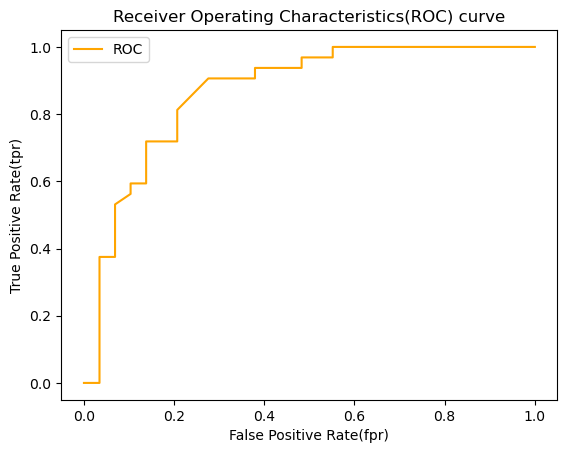

In [117]:
# create a function that plots ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    '''
    plots a ROC curve given the fpr and tpr of a model
    '''
     # plot roc curve
    plt.plot(fpr,tpr,color='orange',label='ROC')

    #plot line with no predictive power(baseline)
    #plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')

    #customize the label
    plt.xlabel('False Positive Rate(fpr)')
    plt.ylabel('True Positive Rate(tpr)')
    plt.title('Receiver Operating Characteristics(ROC) curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [118]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

np.float64(0.8669181034482759)

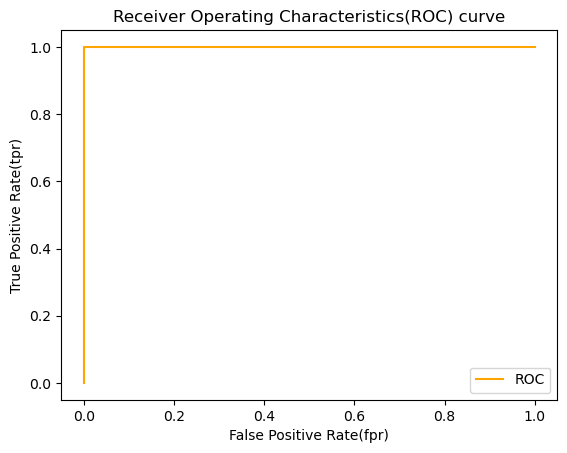

In [119]:
# plot perfect ROc curve & AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [120]:
#perfect AUC score is :
roc_auc_score(y_test,y_test)

np.float64(1.0)

### c. confusion Matrix.
- A confusion matrix is a quick way to compare the labels a model predicts and the actual label it was supposed to predict.
- In essence, giving you the idea of where the model is getting confused.

In [121]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [122]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=['Actual Label'],colnames=["predicted Labels"])

predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [123]:
23+6+6+26 # here the 6 & 6 are the confusion matrix, FP & FN. 23 is TN, 26 is TP

61

In [124]:
len(y_preds)

61

In [125]:
# How to install a conda package into the current env from within the jupyter notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

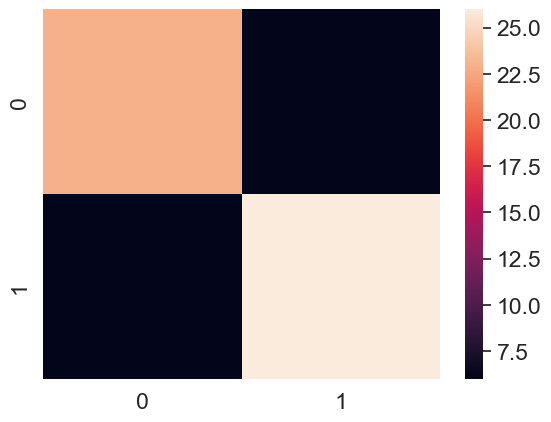

In [126]:
#make our confusion matrix visible with Seaborn's heatmap()
import seaborn as sns # first install seaborn, either from terminal or here in jupyter notebook like above

# set the font scale
sns.set(font_scale=1.5)

#create confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

### creating a confusion matrix using scikit-learn
. To use this new method of creating confusion matrix with sklearn, you will need sklearn version 1.0

In [127]:
import sklearn
sklearn.__version__

'1.6.1'

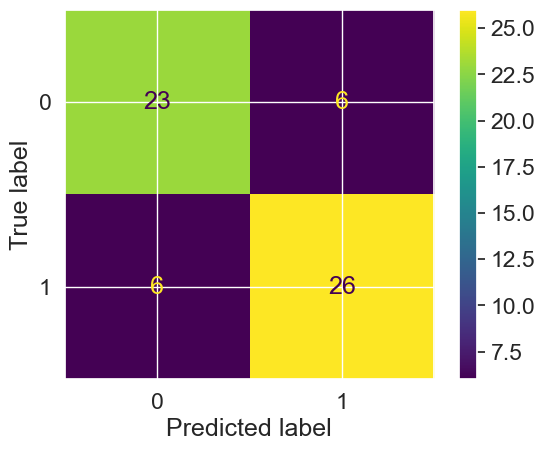

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x_test, y=y_test) # the first X should be capital

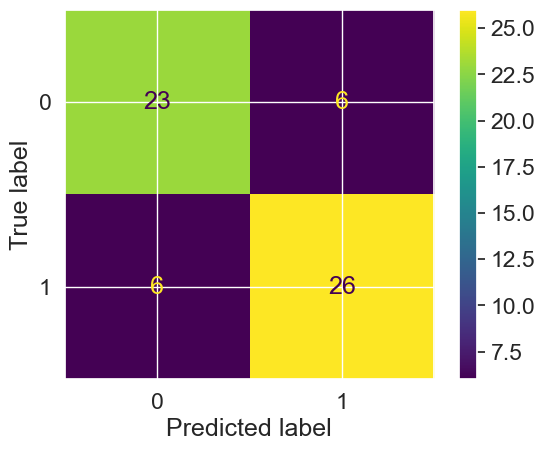

In [129]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

### d. Classification report

In [130]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [131]:
#where precision & recall becomes valuable.Example;
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true,disease_preds, output_dict=True))

C:\Users\hp\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


check out more classification evaluation metrics from this sklearn documentation.
- https://scikit-learn.org/stable/modules/model_evaluation.html
- accuracy is a good measure to begin with if all classes are balanced
- Precision & recall becomes more important when classes are imbalanced
- If FP are worse than FN ,aim for higher precision
- If FN are worse than FP,aim for higher recall
- F1-score is a combination of precision and recall

## 4.2.2 Regression Model Evaluation Metrics
Documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
- Focus on:
1. R^2( pronounced as R-squared)- coefficient of determination- compares your models predictions to the mean of the targets
2. Mean Absolute Error(MAE)
3. Mean Squared Error(MSE)

In [132]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

model.score(x_test,y_test) # returns the coefficient of determination(r2). Unlike accuracy, this can be even negative

0.8065734772187598

In [133]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [134]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [135]:
r2_score(y_true=y_test, y_pred=y_test_mean) # should bring back a score of 0.0 since it is the mean as y_pred

0.0

In [136]:
r2_score(y_true=y_test, y_pred=y_test)# since the y_true & y_pred are the same 

1.0

 Mean Absolute Error
- MAE is the average of the difference between your predictions & the actual target value.Gives you an idea of how wrong your predictions are

In [137]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)

mae = mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [138]:
df = pd.DataFrame(data={'Actual values':y_test,
                        "predicted values": y_preds})
df['Difference'] = df['predicted values'] - df['Actual values']
df.head(10)

,Actual values,predicted values,Difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [139]:
df['Difference'].mean()## Differ from the MAE since there is no Absolute function, it therefore includes the negatives

np.float64(0.012048392126937589)

In [140]:
np.abs(df['Difference']).mean()#absolute one resembles the MAE

np.float64(0.32659871732073664)

Mean Squared Error
- MSE is the mean of the squared errors between actual and predicted values. It amplies the large values/outliers

In [141]:
#my work
df['squared_difference'] = (df['Difference'])**2 # or = np.square(df['Difference'])

In [142]:
df.head()

,Actual values,predicted values,Difference,squared_difference
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [143]:
mse = (df['squared_difference']).mean()
mse

np.float64(0.2534678520824551)

In [144]:
#MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [145]:
df_large_error = df.copy()
df_large_error.loc[20046,'squared_difference'] = 16 # i had to create this

In [146]:
df_large_error.head()

,Actual values,predicted values,Difference,squared_difference
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [147]:
# calculate MSE with large error
df_large_error['squared_difference'].mean()

np.float64(0.2573437523766412)

In [148]:
df_large_error[1:100] = 20

In [149]:
df_large_error

,Actual values,predicted values,Difference,squared_difference
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [150]:
# calculate MSE with large error
df_large_error['squared_difference'].mean()

np.float64(0.7334180712088106)

Root Mean Squared Error(RMSE)- is basically the square root of mse

### 4.2 Finally using the scoring parameter

In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [152]:
np.random.seed(42)

#cross_validation accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring=None)## if scoring = none, estimator's default scoring metrics is used(accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [153]:
#cross_validated accuracy
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100.:2f}%')

The cross-validated accuracy is:82.480874%


In [154]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [155]:
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is:82.48%


In [156]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [157]:
#cross_validated_precision
print(f'The cross-validated precision is:{np.mean(cv_precision)}')

The cross-validated precision is:0.8329547346025924


In [158]:
#Recall
np.random.seed(42)
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [159]:
#cross_validated_recall
print(f'The cross-validated recall is:{np.mean(cv_recall)}')

The cross-validated recall is:0.8545454545454545


Let's see the 'scoring' being used for a regression problem

In [160]:
np.random.seed(42)
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

model = RandomForestRegressor()


In [162]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=3,scoring=None)
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [163]:
#mean absolute error
cv_mae = cross_val_score(model,x,y,cv=3,scoring='neg_mean_absolute_error')##Higher is better
np.mean(cv_mae)

np.float64(-0.48474651661821716)

In [164]:
cv_mae# higher is better

array([-0.52258481, -0.424984  , -0.50667074])

In [165]:
#mean squared error
cv_mse =cross_val_score(model,x,y,cv=3,scoring='neg_mean_squared_error')
np.mean(cv_mse)

np.float64(-0.4612318847966544)

In [166]:
cv_mse# higher or near 0 for the negative is better

array([-0.51325643, -0.32925916, -0.54118007])

## 4.3 Using different evaluation metrics as scikit_learn functions
- The third way to evaluate sklearn ML model/estimators is to using the sklearn.metrics module.
- https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics

In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)
#make predictions
y_preds = clf.predict(x_test)
# Evaluate the model using the evaluation functions
print(f'Classification metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100.:2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

Classification metrics on the test set
Accuracy: 85.245902%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [168]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop('target', axis=1)
y = housing_df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

# Evaluate the model using the evaluation functions
print(f'Regression metrics on the test set')
print(f'R2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression metrics on the test set
R2: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


# 5. Improving Predictions
 First Predictions = baseline predictions.
 First Model = baseline model.
 

From data perspective;
* could we collect more data?( generally, more data, the better)
* could we improve our data?
  
From models perspective;
* Is there a better model we could use?- the sklearn ML map
* could we improve the current model?

Hyperparameters vs parameters
* parameters- model finds these patterns in data 
* Hyperparameters- settings on the model you can adjust to (potentiall) improve its ability to find patterns

Three ways to adjust Hyperparameters:
   1. By Hand
   2. Randomly with RandomSearchCV
   3. Exhaustively with GridSearchCV

In [169]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [170]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning  Hyperparameters by Hand
Let's make 3 sets; training, validation and test.

In [171]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to adjust:
* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [172]:
#create a function to make work easier
def evaluate_preds(y_true,y_preds):
    '''
    performs evaluation comparison on y_true labels and y_preds labels on a classification
    '''
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                   'precision':round(precision,2),
                   'recall':round(recall,2),
                   'f1': round(f1,2)}
    print(f'Acc:{accuracy*100:.2f}%')
    print(f'Precision:{precision:.2f}')
    print(f'Recall:{recall:.2f}')
    print(f'F1:{f1:.2f}')

    return metric_dict
    

In [173]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [174]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the dat
heart_disease_shuffled = heart_disease.sample(frac=1)

#split the data into x & y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# split the data into tran,validation and test
train_split = round(0.7 *len(heart_disease_shuffled))#70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
x_train,y_train =x[:train_split], y[:train_split]
x_valid,y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test = x[valid_split:],y[valid_split:]

#instantiate
clf =RandomForestClassifier()
#fit model
clf.fit(x_train,y_train)
#make baseline predictions--note the model gets tuned on the validation split
y_preds= clf.predict(x_valid)
#evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics                    

Acc:82.22%
Precision:0.81
Recall:0.88
F1:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [175]:
len(x_train),len(x_valid),len(x_test)

(212, 45, 46)

In [176]:
#Tune/play with hyperparameters to make the model better
#create a different classifier with a different hyperparameter
clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(x_train,y_train)
#make predictions with different hyperparameters
y_preds= clf_2.predict(x_valid)
#evaluate this 2nd classifier on the validation set
clf_2_metrics = evaluate_preds(y_valid,y_preds)
clf_2_metrics

Acc:80.00%
Precision:0.81
Recall:0.84
F1:0.82


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

In [177]:
clf_3= RandomForestClassifier(n_estimators=100,max_depth=10)##max_depth
clf_3 = RandomForestClassifier(n_estimators=10)
clf_3.fit(x_train,y_train)
#make predictions with different hyperparameters
y_preds= clf_3.predict(x_valid)
#evaluate this 3rd classifier on the validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics  

Acc:82.22%
Precision:0.84
Recall:0.84
F1:0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2 Hyperparameters Tuning with RandomizedSearchCV

In [178]:
from sklearn.model_selection import RandomizedSearchCV
grid = {'n_estimators':[10,100,200,500,1000,1200],
        'max_depth':[None,5,10,20,20],
        'max_features':['auto','sqrt'],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,2,4]}
np.random.seed(42)

x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)##how much of your processor are you dedicating to this ML model

##set up RandomSearchCv
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #number of models to try
                           cv=5,
                           verbose=2)
#fit the RandomizedSearchCv version of clf
rs_clf.fit(x_train,y_train);



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\hp\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\hp\Desktop\sample_project_1\env\Lib\si

In [179]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [180]:
#make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)## There is no improvement from By hand , it is just by trial

Acc:81.97%
Precision:0.77
Recall:0.86
F1:0.81


### 5.3 Hyperparameter with GridSearchCV

In [181]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [182]:
##GridSearchCV goes through the whole combinations available. we chose those close to best grid of RandomizedsearchCV
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [ 6],
          'min_samples_leaf': [1, 2]}

In [183]:
3*1*2*1*2*5

60

In [184]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)##how much of your processor are you dedicating to this ML model

##set up GridSearchCv
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)
#fit the GridSearchCv version of clf
gs_clf.fit(x_train,y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\hp\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\hp\Desktop\sample_project_1\env\Lib\si

In [185]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [186]:
##make the predictions using the best hyperparameter found above
gs_y_preds = gs_clf.predict(x_test)
#make evaluation
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1:0.81


Tuning Hyperparameters is a trial and error; so process is start By Hand then have an idea and go for RandomizedSearchCV and then GridSearchCV

#### Let us compare our different models metrics

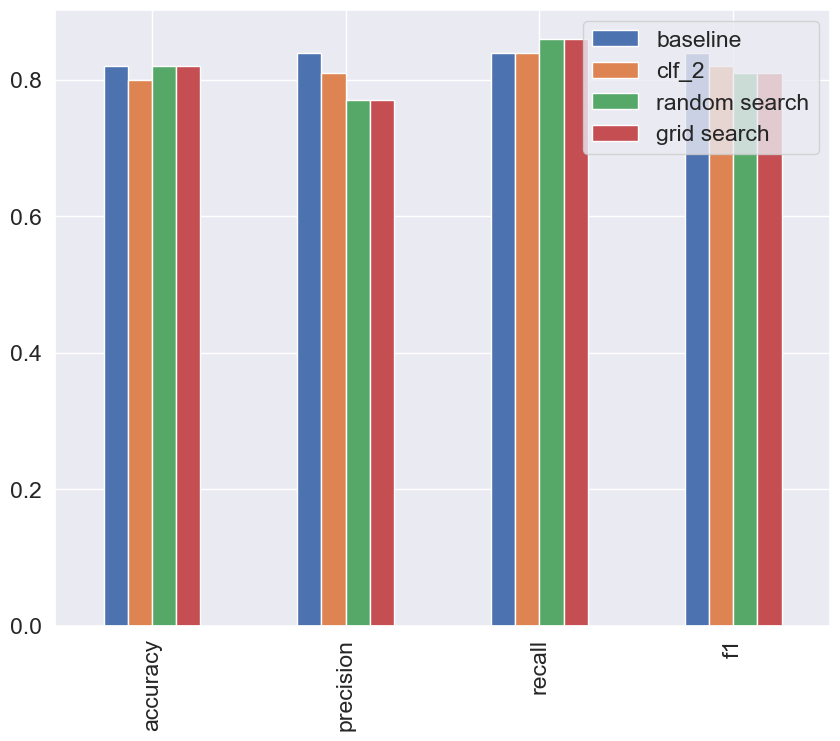

In [187]:
compare_metrics = pd.DataFrame({'baseline':baseline_metrics,
                              'clf_2':clf_2_metrics,
                              'random search':rs_metrics,
                              'grid search':gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))
plt.show() 

##Ensure you compare your model metrics that have all been run from the same set of data. 
##This one is has a small error now that some are not from same split ie (x_test,y_test).Here different split was used for the baseline model

In [188]:
### Correlation analysis; - Forward/Backward Attribute selection. eg size of land & house size on price of land

## 6. Saving & Loading Trained ML models.
Two ways to save and load ML models
- 1. with python's `pickle` module
- 2. with `joblib` module

Pickle

In [189]:
import pickle
#save an existing model to file
pickle.dump(gs_clf,open('gs_random_forest_model_1.pkl','wb'))

In [190]:
# load a saved model
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl','rb'))

In [191]:
##make the predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [192]:
gs_metrics## the run through for gs_clf.

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

Joblib
- Joblib prefered for saving & loading large models over pickle

In [196]:
from joblib import dump, load
#save model to file
dump(gs_clf,filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [197]:
# import a saved joblib model
loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')

In [199]:
# make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [200]:
gs_metrics ##similar

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together

## sk-learn workflow
0. End to end scikit-learn workflow
1. Get data ready>
2. pick a model\estimator(to suit your problem)>
3. Fit the model to the data & make a prediction>
4. Evaluate the model
5. Improve through experimentation
6. Save & reload your trained ML model
7. Putting it all together

In [201]:
data = pd.read_csv('data/car-sales-extended-missing-data (1).csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [203]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [204]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do (all in one cell:)- we will use PIPELINE
- 1. fill the missing data
- 2. convert data to numbers
- 3. Build a model on the data

In [224]:
#Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#set up random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels(y)
data = pd.read_csv('data/car-sales-extended-missing-data (1).csv')
data.dropna(subset=['Price'],inplace=True)

# Define different features and transformer pipeline
categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))])
door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant', fill_value=4))])
numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))])

#setup preprocessing steps(fill missing values,convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',categorical_transformer,categorical_features),
        ('door',door_transformer, door_feature),
        ('num',numeric_transformer, numeric_features)
    ])
#creating a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor',preprocessor),
                        ('model',RandomForestRegressor())])
#split data
x = data.drop('Price',axis=1)
y = data['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

It's also possible to use `GridSeachCV` and `RandomizedSearchCV` in our `Pipeline`

In [231]:
# Use GridSearchCV with our Regression pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features':['sqrt'],
    'model__min_samples_split':[2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

In [232]:
gs_model.score(x_test,y_test)

0.2848784564026805

In [233]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}